In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('pablet')

In [4]:
data= pd.read_csv('data.csv', skiprows=1, sep=',')
data.head()
#SFR in log
#Flux in 10^-17 ergs/s/cm^2
#Luminosity distance in cm

,ID,z,Halpha,Hbeta,BalmerD,SFR,LD
0,299489676975171584,0.021275,462.11760,98.78678,4.677929,-0.520650,2.854778e+26
1,299489677444933632,0.021222,472.59040,119.49560,3.954875,-0.527342,2.847527e+26
2,299490502078654464,0.064656,99.40005,25.64047,3.876687,-1.155230,8.960103e+26
3,299491051364706304,0.055988,181.52620,47.36650,3.832376,-0.318228,7.710194e+26
4,299491051834468352,0.052654,127.30580,38.33226,3.321113,-0.411009,7.233454e+26


In [5]:
k_alpha= 3.33
k_beta= 4.60

reddening= (2.5/(k_beta-k_alpha))*np.log10(data['BalmerD']/2.86)

H_alpha= (1e-17*data['Halpha']*(4*np.pi*data['LD']**2))*10**(0.4*k_alpha*reddening)

SFR= 8e-42*H_alpha

In [6]:
df= pd.DataFrame({
    'SDSS': data['SFR'],
    'Estimated': np.log10(SFR)
})

print(df)

        SDSS  Estimated
0  -0.520650  -0.861504
1  -0.527342  -1.045183
2  -1.155230  -0.749329
3  -0.318228  -0.631363
4  -0.411009  -1.003943
..       ...        ...
95  0.353776  -0.102414
96 -1.104310  -0.737610
97 -1.021468  -1.007561
98  0.426864  -0.740588
99 -1.104879  -0.272211

[100 rows x 2 columns]


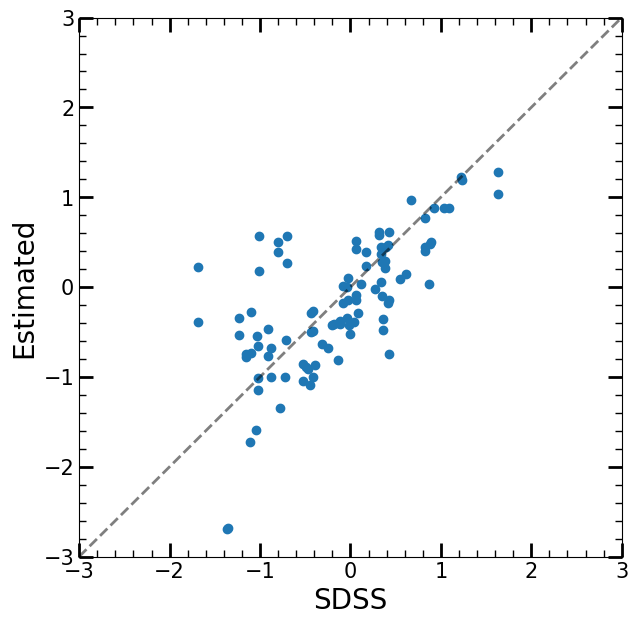

In [25]:
fig= plt.figure(figsize=(7,7))
plt.scatter(df['SDSS'], df['Estimated'])
plt.xlabel('SDSS')
plt.ylabel('Estimated')
plt.plot([-3,3],[-3,3],'k--',alpha=0.5,lw=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()